# Final Project Analisa Media Sosial
## Alfina Nur Safitri | 11200940000009
## Ryandana Setyawan | 11200940000031

# Install Module



In [ ]:
import warnings; warnings.simplefilter('ignore')
!pip install Sastrawi
!pip install textblob
!pip install wget
!pip install tqdm
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=75d2ce869c7c7a2ede1048172f4e15069359ca0a68d0017c24c4b3aa6cffea8c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.8 MB/s eta 0:00:00


# Import Module

In [ ]:
import pandas as pd
import random
import re
import nltk
import torch
import requests
import json
import Sastrawi
import urllib.request
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from tqdm import tqdm
from html import unescape
from sklearn import svm
from sklearn.svm import SVC
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from textblob import TextBlob
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
random.seed(7)

In [ ]:
# Loading Data
try:
    data1 = pd.read_csv('data/data-sentimen/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('data/data-sentimen/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from local file.")
except:
    data1 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from Github.")

Loaded from Github.


In [ ]:
data1 = data1.drop(columns=['Id']).rename(columns={'Instagram Comment Text':'Content'})
data2 = data2.drop(columns=['Id','Acara TV','Jumlah Retweet']).rename(columns={'Text Tweet':'Content'})
data3 = data3.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data4 = data4.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data5 = data5.drop(columns=['Id','Pasangan Calon']).rename(columns={'Text Tweet':'Content'})

df = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
df.head()

,Sentiment,Content
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [ ]:
df["Content"]

0        <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1       Geblek lo tata...cowo bgt dibela2in balikan......
2       Kmrn termewek2 skr lengket lg duhhh kok labil ...
3       Intinya kalau kesel dengan ATT nya, gausah ke ...
4       hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...
                              ...                        
2195    Kali saja bpk @aniesbaswedan @sandiuno lihat, ...
2196    Kita harus dapat merangkul semua orang tanpa b...
2197    Ini jagoanku dibidang digital <Smiling Face Wi...
2198                 #PesanBijak #OkeOce #GubernurGu3 ...
2199    Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...
Name: Content, Length: 2200, dtype: object

In [ ]:
hashtags = []
for tweet in df['Content']:
    hashtag_list = re.findall(r'#\w+', tweet)
    hashtags.extend(hashtag_list)

# Banyaknya hashtag per setiap hashtag
hashtag_counts = pd.Series(hashtags).value_counts()
hashtag_counts

#AHY                        160
#AhokDjarot                 153
#AniesSandi                 122
#pilkadadki2017              99
#kickandy                    50
                           ... 
#RakernasDemokrat2017         1
#partaidemokrat               1
#lombok                       1
#gilitrawangan                1
#AniesSandiJawaraJakarta      1
Length: 769, dtype: int64

In [ ]:
len(hashtags)

2219

In [ ]:
top_10_hashtags = hashtag_counts.head(10)
print(top_10_hashtags)

Top 10 Hashtags:
#AHY               160
#AhokDjarot        153
#AniesSandi        122
#pilkadadki2017     99
#kickandy           50
#PilkadaDKI         46
#ahokdjarot         45
#PilkadaDKI2017     39
#Ahok               36
#ILC                32
dtype: int64


# Mengecek dan menangani Duplikasi

In [ ]:
df[df.duplicated()==True]

,Sentiment,Content
57,negative,"<USERNAME> ini lagi pemikiran manusia bodoh, ..."
71,negative,<USERNAME> bisa nya cuma ngatain org . Nyindi...
94,negative,Dasar artis abal abal enggk laku di layar kaca...
971,positive,Terimakasih ya <PROVIDER_NAME> gratis 4Gnya ay...
1053,negative,Jaringan internet <PROVIDER_NAME> di sumba tim...
1255,positive,"pokoknya kalian harus nonton film kartini, asl..."
1280,positive,nah ini. coba nonton filmnya deh. asik parah
1426,negative,ahoker masih bully #AHY
2038,negative,"Setelah KO di beberapa Polling, kini mereka go..."


In [ ]:
# cek duplikasi
print(df.duplicated().sum())

# membuang duplikasi
df.drop_duplicates(inplace=True)
print(df.shape)

9
(2191, 2)


# Melakukan Sampling


In [ ]:
# Menghitung jumlah contoh dalam masing-masing kelas
class_counts = df['Sentiment'].value_counts()
class_counts

negative    1105
positive    1086
Name: Sentiment, dtype: int64

In [ ]:
# menyeimbangkan kelas
min_samples = 1086

df_pos = df[df['Sentiment']=='positive'].sample(min_samples, random_state=7)
df_neg = df[df['Sentiment']=='negative'].sample(min_samples, random_state=7)

df = pd.concat([df_pos, df_neg], axis=0)

# memeriksa hasil undersampling
df.Sentiment.value_counts()

positive    1086
negative    1086
Name: Sentiment, dtype: int64

# Preprocessing


In [ ]:
# import slang
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/slang.dic'
response = urllib.request.urlopen(url)
slang_id = eval(response.read())

print("jumlah slang: ", len(slang_id))

jumlah slang:  1629


In [ ]:
# jika ada slang yang belum tertangani
slang_tambahan = {
    'gak': 'tidak',
    'abis': 'habis',
    'jgn': 'jangan',
    'geblek': 'goblok',
}
slang_id.update(slang_tambahan)

print("jumlah slang : ", len(slang_id))

jumlah slang :  1630


In [ ]:
# import stopword
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/stopwords_id.txt'
response = urllib.request.urlopen(url)
stopword_id = response.read().decode('utf-8').split('\n')

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  758


In [ ]:
# bisa ditambahkan jika ada stopword yang belum tertangani
stopword_tambahan = set(['a',
                         'b', 'biar', 'bang',
                         'c',
                         'd', 'deh',
                         'e',
                         'f', 'film', 'face',
                         'g', 'google',
                         'h',
                         'i',
                         'j',
                         'k', 'kuota', 'kah',
                         'l',
                         'm', 'mata', 'metro', 'mas', 'mbak',
                         'n', 'name', 'nya', 'nonton', 'najwa',
                         'o',
                         'p', 'provider', 'product',
                         'q',
                         'r',
                         's', 'sih', 'si',
                         't', 'TP', 'tv', 'tonton',
                         'u', 'username', 'url',
                         'v',
                         'w',
                         'x',
                         'y',
                         'z',])
stopword_id = set(stopword_id).union(stopword_tambahan)

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  808


In [ ]:
# data cleaning
def cleaning_text(text):
  # menghapus url
  url_pattern = re.compile(r'(\w+:\/\/\S+)')
  text = url_pattern.sub(' ', text)
  # menghapus hashtag
  hashtag_pattern = re.compile(r'#\w+\b')
  text = hashtag_pattern.sub(' ', text)
  # menghapus nama pengguna instagram (memuat "@")
  username_pattern = re.compile(r'@\w+\b\s*')
  text = username_pattern.sub(' ', text)
  # menghapus angka
  text = re.sub(r'\b\d+\b|[^\w\s]', '', text)
  # mengahpus simbol
  symbol_pattern = re.compile(r'[^\w\s]+')
  text = symbol_pattern.sub(' ', text)
  # menghapus karakter yang tidak diperlukan (tergantung media sosial)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'\r', ' ', text)
  text = re.sub(r'&\w+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  # menangani huruf kapital dan spasi
  text = unidecode(unescape(text.lower().strip()))
  return text

def remove_stopword(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stopword_id]
  return ' '.join(filtered_sentence)

def stemming_and_lemmatization(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  return stemmer.stem(text)

def remove_slang(text):
  text = ''.join(slang_id[p] if p in slang_id else p for p in re.split(r'(\W+)', text))
  return text

def preprocess(text):
  # cleaning text and lowercase
  output = cleaning_text(text)
  # remove slang
  output = remove_slang(output)
  # stemming and lemmatization
  output = stemming_and_lemmatization(output)
  # remove stopwords
  output = remove_stopword(output)

  return output
"done"

'done'

In [ ]:
df['clean_text'] = ''
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_text'] = preprocess(post.Content)

2172it [15:52,  2.28it/s]


In [ ]:
teks_bersih = df['clean_text'].copy()
teks_bersih[0]

'tolol hubung gugur pakai hijab syar bilang bayi panas dalem hubung woyyyy otak jempol singkron iya nulis komentar'

In [ ]:
teks_bersih

977     buka puasa streaming youtube lancar banget pak...
1470    lsi bukti jujur surveynya pilih kepala daerah ...
1260    terngiang2 critical eleven iya tuhan betapa aj...
1759           selamat istirahat ronde lawan jahat menang
2082                             sandi menang minimal tps
                              ...                        
454       asa aneh acara hitam putih anak sekolah sekolah
665     pulang rumah mati urus miskin now watching tar...
593                       butuh fakta bukti bicara bohong
1406    ahy menang pilih gubernur daerah khusus ibukot...
1743    kampanye bicara program program tri pecat with...
Name: clean_text, Length: 2172, dtype: object

# Support Vector Machine

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Pre-trained
# ketentuan: 30% test, 70% train
x = df['clean_text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

print(x_train.shape, x_test.shape)

(1520,) (652,)


In [ ]:
# Cross Validasi
# Menentukan optimal parameter SVM dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [ ]:
# Optimal parameter SVM dengan RandomizedSearch

seed = 99
kCV = 5
metric = 'accuracy'
paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

randsvmCV = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randsvmCV.fit(x_train, y_train)
print(randsvmCV.best_score_)
print(randsvmCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.7611842105263158
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.95, 'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__decision_function_shape': 'ovo', 'svc__C': 100}


In [ ]:
# Melakukan vektorisasi menggunakan TF-IDF
vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, ngram_range=(1, 3), max_df=0.75, min_df=5)
x_train_vectorized = vsm.fit_transform(x_train)
x_test_vect = vsm.transform(x_test)

print(x_train_vectorized.shape, x_test_vect.shape)

(1520, 586) (652, 586)


In [ ]:
# evaluasi model
from sklearn import svm

dSVM = svm.SVC()
dSVM.fit(x_train_vectorized, y_train)
y_SVM = dSVM.predict(x_test_vect)

print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.7377300613496932
[[225 101]
 [ 70 256]]
              precision    recall  f1-score   support

    negative       0.76      0.69      0.72       326
    positive       0.72      0.79      0.75       326

    accuracy                           0.74       652
   macro avg       0.74      0.74      0.74       652
weighted avg       0.74      0.74      0.74       652



In [ ]:
from sklearn import datasets
import joblib

# Simpan model optimal SVM ke file
joblib.dump(dSVM, 'svm_model.pkl')


['svm_model.pkl']

In [ ]:
from google.colab import files

# Unduh file 'svm_model.pkl'
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df.to_csv('svm_model.csv', index=False)
files.download('svm_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# confusion matrix untuk evaluasi kerja model; membandingkan hasil prediksi dengan nilai sebenarnya
cm = confusion_matrix(y_test, y_SVM)
cm

array([[225, 101],
       [ 70, 256]])

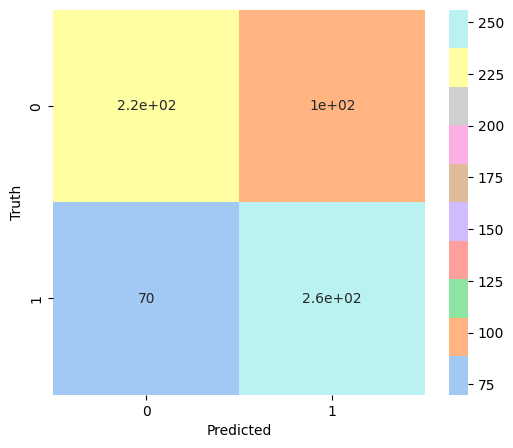

In [ ]:
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap=colors)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


# Dashboard

# WordClouds

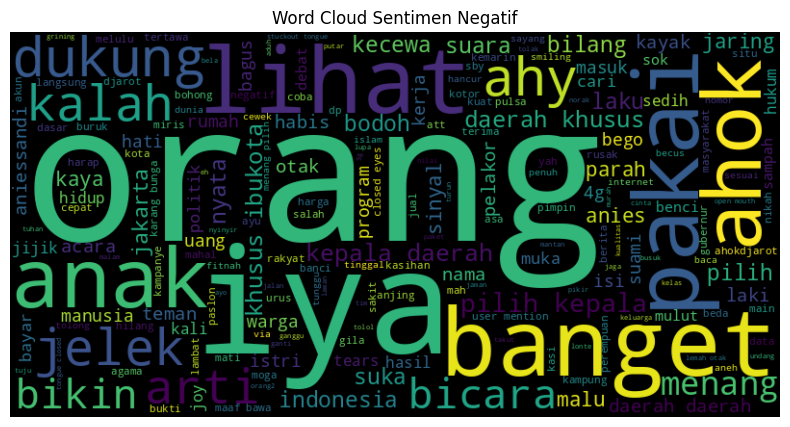

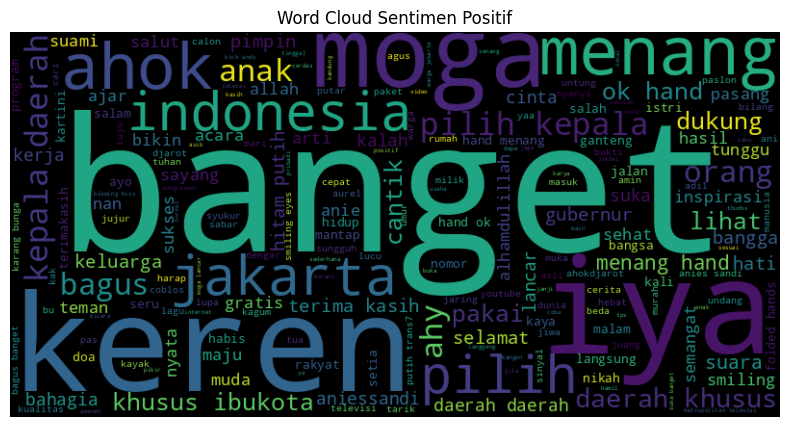

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca file CSV
df1 = pd.read_csv('https://raw.githubusercontent.com/alfina33/Sentiment-Analysis/main/svm_model.csv')

# Membuat subset data sentimen negatif
df_negatif = df1[df1['Sentiment'] == 'negative']
# Menggabungkan semua teks dari kolom 'cleaned_text' pada sentimen negatif menjadi satu string
text_negatif = ' '.join(df_negatif['clean_text'].astype(str))

# Membuat subset data sentimen positif
df_positif = df1[df1['Sentiment'] == 'positive']
# Menggabungkan semua teks dari kolom 'cleaned_text' pada sentimen positif menjadi satu string
text_positif = ' '.join(df_positif['clean_text'].astype(str))

# Membuat WordCloud untuk sentimen negatif
wordcloud_negatif = WordCloud(width=800, height=400).generate(text_negatif)
# Menampilkan WordCloud sentimen negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('Word Cloud Sentimen Negatif')
plt.axis('off')
plt.show()

# Membuat WordCloud untuk sentimen positif
wordcloud_positif = WordCloud(width=800, height=400).generate(text_positif)
# Menampilkan WordCloud sentimen positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('Word Cloud Sentimen Positif')
plt.axis('off')
plt.show()


# N-Gram

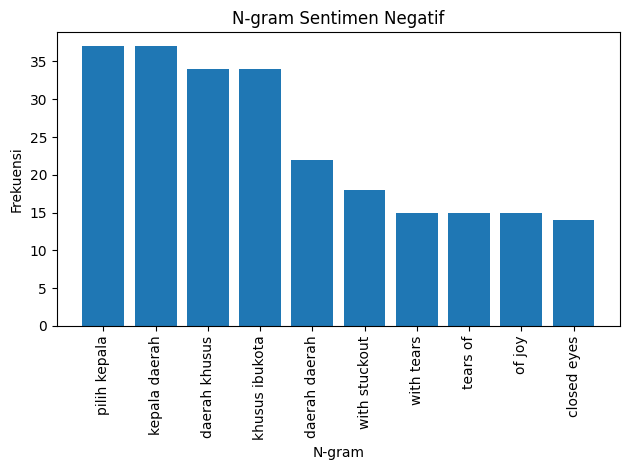

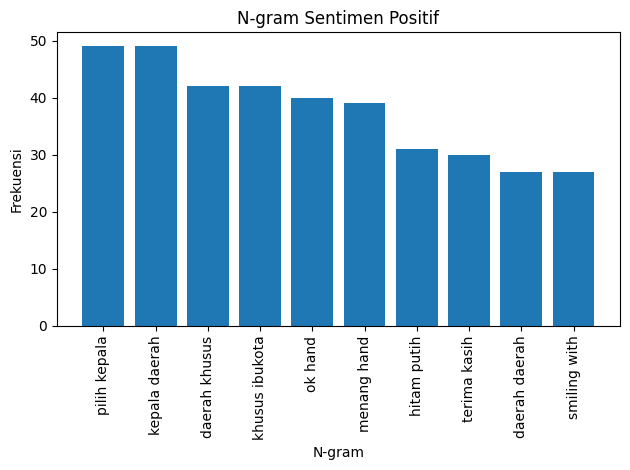

In [ ]:
# import dari model yang berbentuk csv

import pandas as pd
from nltk.util import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Membuat subset data sentimen negatif
df_negatif = df1[df1['Sentiment'] == 'negative']
# Menggabungkan semua teks dari kolom 'clean_text' pada sentimen negatif menjadi satu string
text_negatif = ' '.join(df_negatif['clean_text'].astype(str))

# Membuat subset data sentimen positif
df_positif = df1[df1['Sentiment'] == 'positive']
# Menggabungkan semua teks dari kolom 'clean_text' pada sentimen positif menjadi satu string
text_positif = ' '.join(df_positif['clean_text'].astype(str))

# Membuat n-gram untuk sentimen negatif
tokens_negatif = text_negatif.split()
n = 2  # Menentukan jumlah kata dalam n-gram
ngram_negatif = list(ngrams(tokens_negatif, n))

# Menghitung frekuensi n-gram sentimen negatif
freq_negatif = FreqDist(ngram_negatif)
most_common_negatif = freq_negatif.most_common(10)

# Membuat barplot untuk n-gram sentimen negatif
labels_negatif, counts_negatif = zip(*most_common_negatif)
labels_negatif = [' '.join(label) for label in labels_negatif]  # Menggabungkan tuple n-gram menjadi string
counts_negatif = list(counts_negatif)  # Mengonversi counts menjadi list
plt.bar(labels_negatif, counts_negatif)
plt.xlabel('N-gram')
plt.ylabel('Frekuensi')
plt.title('N-gram Sentimen Negatif')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

print()

# Membuat n-gram untuk sentimen positif
tokens_positif = text_positif.split()
ngram_positif = list(ngrams(tokens_positif, n))

# Menghitung frekuensi n-gram sentimen positif
freq_positif = FreqDist(ngram_positif)
most_common_positif = freq_positif.most_common(10)

# Membuat barplot untuk n-gram sentimen positif
labels_positif, counts_positif = zip(*most_common_positif)
labels_positif = [' '.join(label) for label in labels_positif]  # Menggabungkan tuple n-gram menjadi string
counts_positif = list(counts_positif)  # Mengonversi counts menjadi list
plt.bar(labels_positif, counts_positif)
plt.xlabel('N-gram')
plt.ylabel('Frekuensi')
plt.title('N-gram Sentimen Positif')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [ ]:
# ngram dari df

def tokenization(df):
    texts = df['clean_text'].fillna('')
    tokens = [token for text in texts for token in text.split()]
    return tokens

In [ ]:
ngram = tokenization(df)
ngram[:5]

['buka', 'puasa', 'streaming', 'youtube', 'lancar']

In [ ]:
(pd.Series(nltk.ngrams(ngram, 1)).value_counts())[50:70]

(warga,)      39
(teman,)      39
(laku,)       38
(jaring,)     38
(hasil,)      37
(suami,)      36
(eyes,)       36
(the,)        35
(bunga,)      35
(rakyat,)     35
(rumah,)      35
(habis,)      34
(lancar,)     34
(4g,)         34
(cinta,)      34
(cari,)       33
(bangga,)     33
(program,)    32
(hidup,)      32
(kayak,)      32
dtype: int64

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(ngram, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(ngram, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

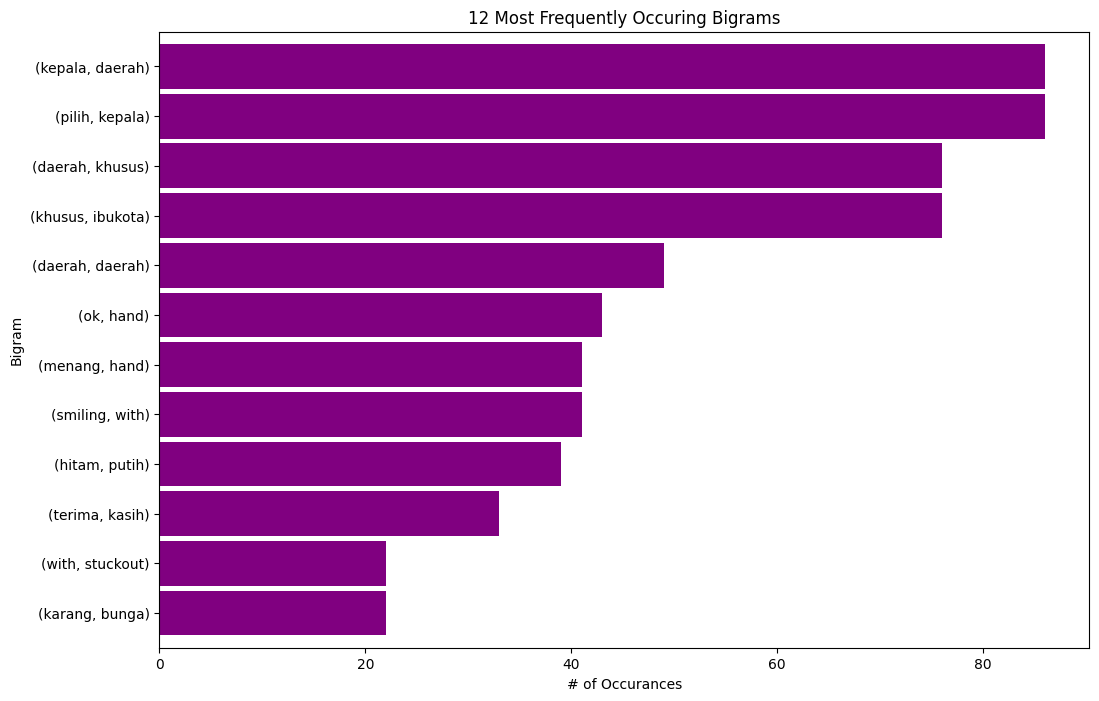

In [ ]:
ax = bigrams_series.sort_values().plot.barh(color='purple', width=.9, figsize=(12, 8))
plt.title('12 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Barplot banyaknya sentimen negatif dan positif

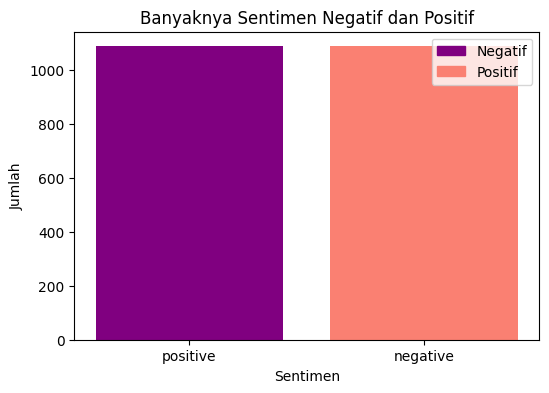

In [ ]:
# dari data csv (model yang optimal)
sentiment_counts = df1['Sentiment'].value_counts()
colors = ['purple', 'salmon']
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Banyaknya Sentimen Negatif dan Positif')
legend_labels = ['Negatif', 'Positif']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels)
plt.show()


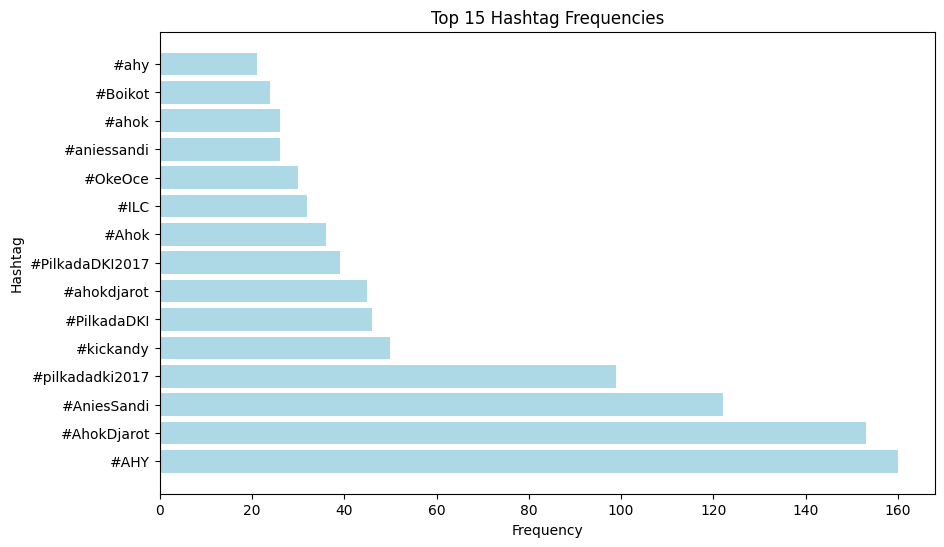

In [ ]:
# analisa hashtag
n = 15  # Number of top frequent hashtags to be plotted
top_n_hashtags = hashtag_counts.head(n)

# bar chart hashtag
plt.figure(figsize=(10, 6))
plt.barh(top_n_hashtags.index, top_n_hashtags.values, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.title(f'Top {n} Hashtag Frequencies')
plt.show()